Clean columns: ['Statistic Label', 'Year', 'Sex', 'Criteria for Projection', 'UNIT', 'VALUE']


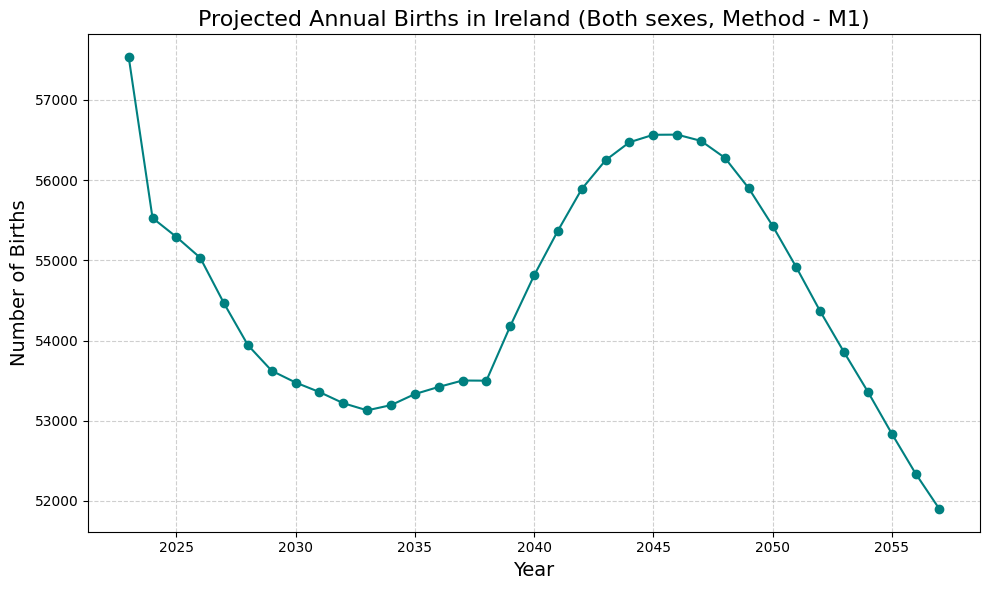

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "projectedbirths-cso.csv"

# 1. Read the file as raw text, fix broken quotes
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    content = f.read()

# 2. Replace problematic quotes with nothing
content = content.replace('"', '')

# 3. Save the cleaned content into a temporary CSV file
with open("cleaned_births.csv", "w", encoding="utf-8") as f:
    f.write(content)

# 4. Now read it normally
df = pd.read_csv("cleaned_births.csv", delimiter=",")
df.columns = df.columns.str.strip()

print("Clean columns:", df.columns.tolist())

# 5. Filter for total births (Both sexes, Method - M1)
df_filtered = df[
    (df["Sex"] == "Both sexes") &
    (df["Criteria for Projection"] == "Method - M1")
]

# 6. Plot the result
plt.figure(figsize=(10, 6))
plt.plot(df_filtered["Year"], df_filtered["VALUE"], marker='o', color='teal')

plt.title("Projected Annual Births in Ireland (Both sexes, Method - M1)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Births", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
